In [1]:
import pandas as pd
import pickle
with open('./labels.pkl','rb') as file:
    labels = pickle.load(file)

In [2]:
df = pd.read_csv('extracted_med_papers.csv')
df

,AccessionID,JournalID,JIF
0,PMC9439785,"0025-7974,1536-5964,",1.4
1,PMC9159206,"1368-5031,1742-1241,",2.4
2,PMC10685901,"1029-2977,1735-3947,1029-2977,",1.0
3,PMC9718913,"2050-0904,",0.6
4,PMC10759104,"2044-6055,",2.3
...,...,...,...
118557,PMC10571083,"0002-7863,1520-5126,",15.7
118558,PMC9147456,"2077-0383,",2.9
118559,PMC9696955,"2077-0383,",2.9
118560,PMC9701189,"2041-1723,",15.7


In [3]:
with open('./corpus.pkl','rb') as file:
    corpus = pickle.load(file)

In [4]:
word_count = []
for c in corpus:
    word_count.append(len(c.split()))

In [5]:
df['Word Count'] = word_count
df

,AccessionID,JournalID,JIF,Word Count
0,PMC9439785,"0025-7974,1536-5964,",1.4,4469
1,PMC9159206,"1368-5031,1742-1241,",2.4,335
2,PMC10685901,"1029-2977,1735-3947,1029-2977,",1.0,1364
3,PMC9718913,"2050-0904,",0.6,8746
4,PMC10759104,"2044-6055,",2.3,1262
...,...,...,...,...
118557,PMC10571083,"0002-7863,1520-5126,",15.7,1394
118558,PMC9147456,"2077-0383,",2.9,2833
118559,PMC9696955,"2077-0383,",2.9,1946
118560,PMC9701189,"2041-1723,",15.7,3811


In [6]:
df['Cluster'] = labels
df

,AccessionID,JournalID,JIF,Word Count,Cluster
0,PMC9439785,"0025-7974,1536-5964,",1.4,4469,3
1,PMC9159206,"1368-5031,1742-1241,",2.4,335,7
2,PMC10685901,"1029-2977,1735-3947,1029-2977,",1.0,1364,4
3,PMC9718913,"2050-0904,",0.6,8746,3
4,PMC10759104,"2044-6055,",2.3,1262,7
...,...,...,...,...,...
118557,PMC10571083,"0002-7863,1520-5126,",15.7,1394,1
118558,PMC9147456,"2077-0383,",2.9,2833,6
118559,PMC9696955,"2077-0383,",2.9,1946,1
118560,PMC9701189,"2041-1723,",15.7,3811,4


In [7]:
df = df[df['Word Count'] < 50000]
df

,AccessionID,JournalID,JIF,Word Count,Cluster
0,PMC9439785,"0025-7974,1536-5964,",1.4,4469,3
1,PMC9159206,"1368-5031,1742-1241,",2.4,335,7
2,PMC10685901,"1029-2977,1735-3947,1029-2977,",1.0,1364,4
3,PMC9718913,"2050-0904,",0.6,8746,3
4,PMC10759104,"2044-6055,",2.3,1262,7
...,...,...,...,...,...
118557,PMC10571083,"0002-7863,1520-5126,",15.7,1394,1
118558,PMC9147456,"2077-0383,",2.9,2833,6
118559,PMC9696955,"2077-0383,",2.9,1946,1
118560,PMC9701189,"2041-1723,",15.7,3811,4


In [8]:
df = df[df['JIF'] < 50]
df

,AccessionID,JournalID,JIF,Word Count,Cluster
0,PMC9439785,"0025-7974,1536-5964,",1.4,4469,3
1,PMC9159206,"1368-5031,1742-1241,",2.4,335,7
2,PMC10685901,"1029-2977,1735-3947,1029-2977,",1.0,1364,4
3,PMC9718913,"2050-0904,",0.6,8746,3
4,PMC10759104,"2044-6055,",2.3,1262,7
...,...,...,...,...,...
118557,PMC10571083,"0002-7863,1520-5126,",15.7,1394,1
118558,PMC9147456,"2077-0383,",2.9,2833,6
118559,PMC9696955,"2077-0383,",2.9,1946,1
118560,PMC9701189,"2041-1723,",15.7,3811,4


In [22]:
df_low = df[df['Cluster'] < 5]
df_high = df[df['Cluster'] >= 5]

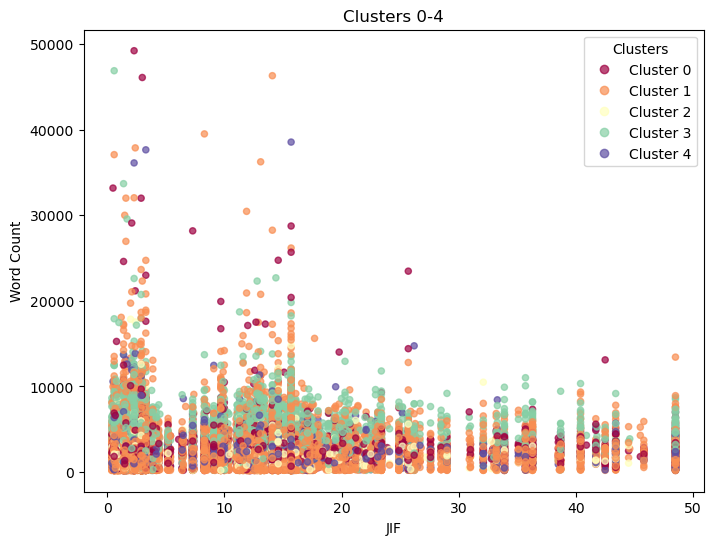

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    df_low['JIF'],
    df_low['Word Count'],
    c=df_low['Cluster'],
    s=20,
    cmap='Spectral',
    alpha=0.7  # lower opacity
)

# Create legend for clusters
handles, _ = scatter.legend_elements()
plt.legend(
    handles,
    [f'Cluster {i}' for i in np.unique(df_low['Cluster'])],
    title='Clusters'
)

plt.xlabel('JIF')
plt.ylabel('Word Count')
plt.title('Clusters 0-4')

# Save figure
plt.savefig('jif_wordcount_clusters_0-4.png', dpi=300, bbox_inches='tight')

plt.show()


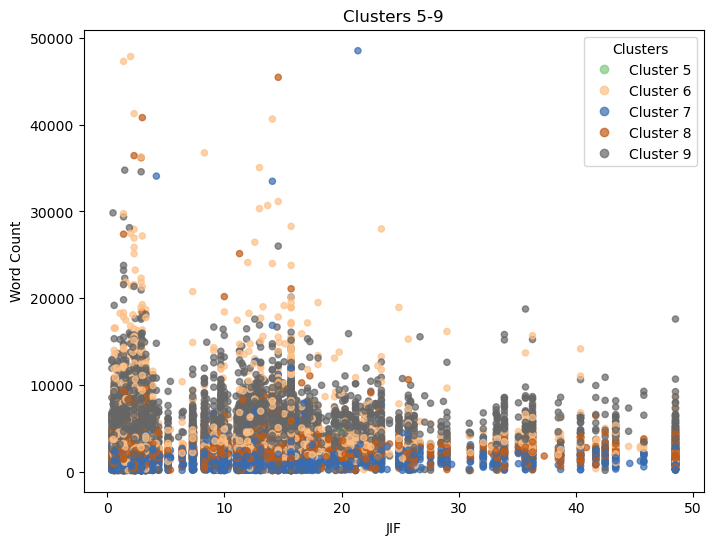

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    df_high['JIF'],
    df_high['Word Count'],
    c=df_high['Cluster'],
    s=20,
    cmap='Accent',
    alpha=0.7  # lower opacity
)

# Create legend for clusters
handles, _ = scatter.legend_elements()
plt.legend(
    handles,
    [f'Cluster {i}' for i in np.unique(df_high['Cluster'])],
    title='Clusters'
)

plt.xlabel('JIF')
plt.ylabel('Word Count')
plt.title('Clusters 5-9')

# Save figure
plt.savefig('jif_wordcount_clusters_5-9.png', dpi=300, bbox_inches='tight')

plt.show()


In [39]:
for i in range(10):
    temp = df[df['Cluster'] == i]
    print(i)
    print(len(temp))
    print(sum(temp['Word Count'])/len(temp))
    print(sum(temp['JIF'])/len(temp))
    med_list = sorted(temp['JIF'])
    n = len(med_list)
    
    if n % 2 == 1:
        median = med_list[n // 2]
    else:
        median = (med_list[n // 2 - 1] + med_list[n // 2]) / 2

    print(median)


0
11057
2584.7768834222666
8.333291127792268
3.3
1
34250
2298.5902481751823
8.284738686131426
3.3
2
5139
2049.0225724849192
8.36110138159174
3.3
3
10044
4256.014137793708
8.316786140979621
3.3
4
6723
2172.58961773018
8.237959244384962
3.2
5
10
2225.1
5.459999999999999
2.15
6
10054
3496.212651680923
8.287179232146372
3.3
7
14379
1628.7102719243342
8.141963975241554
3.3
8
12704
2417.4465522670025
8.225795025188857
3.3
9
13055
4728.612868632707
8.199670624281769
3.2
